# Import libraries

In [2]:
import numpy as np
import itertools
npPath = '/sharedData/scratch/all_npy3/'
ncPath = '/sharedData/scratch/'
acmPath = '/sharedData/scratch/all_npy3/'
DATAPATH = '/goesdata'
import re
import os
from os import path as op
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import netCDF4
from pathlib import Path

#refactor to create folders using subprocess library
#from subprocess import

import matplotlib.dates as mdates
from datetime import datetime

/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [30]:
def getFilteredTmean(SS, npPath, band, day):
   
    ncList = os.listdir( ncPath )
    npList = os.listdir( npPath )
    acmList = os.listdir( acmPath )
    
    look = 'M6C'+ band + '_G' + SS + '_s2019' + day
    acmLook = 'M6_G' + SS + '_s2019' + day
    
    ncFiles = sorted([f for f in ncList if re.search(look,f)])
    npFiles = sorted([f for f in npList if re.search(look,f)])
    acmFiles = sorted([f for f in acmList if re.search(acmLook,f)])
    plot = createFilteredPlotArray(ncFiles,npFiles,npPath,acmFiles)
    return plot


In [3]:
def Rad2BT(rad, planck_fk1, planck_fk2, planck_bc1, planck_bc2):
    """Radiances to Brightness Temprature (using black body equation)"""
    invRad = np.array(rad)**(-1)
    arg = (invRad*planck_fk1) + 1.0
    T = (- planck_bc1+(planck_fk2 * (np.log(arg)**(-1))) )*(1/planck_bc2) 
    return T

In [32]:
def createFilteredPlotArray(ncFiles,npFiles,npPath,acmFiles):#Filtered Histrogram for cloud clear sky mask
    Tmean= []
    times = []
    for ncf, npf, acm in zip(ncFiles, npFiles, acmFiles):
        imageBox = np.load(op.join(npPath,npf))
        acmBox = np.load(op.join(acmPath,acm))
        myFile = xr.open_dataset(op.join(ncPath,ncf))
        planck_fk1 = float(myFile['planck_fk1'].data)
        planck_fk2 = float(myFile['planck_fk2'].data) 
        planck_bc1 = float(myFile['planck_bc1'].data)                       
        planck_bc2 = float(myFile['planck_bc2'].data)     
        T = Rad2BT(imageBox[acmBox==1].mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)
        tString = ncf[34:38]
        times.append(tString)
        Tmean.append(T)
    return times, Tmean
    

In [33]:
def getUnfilteredTmean(SS, ncPath, npPath, band, day):
   
    ncList = os.listdir( ncPath )
    npList = os.listdir( npPath )
    
    look = 'M6C'+ band + '_G' + SS + '_s2019' + day
    
    ncFiles = sorted([f for f in ncList if re.search(look,f)])
    npFiles = sorted([f for f in npList if re.search(look,f)])
    plot = createUnfilteredPlotArray(ncFiles,npFiles,npPath)
    return plot

In [4]:
def createUnfilteredPlotArray(ncFiles,npFiles,npPath):#Filtered Histrogram for cloud clear sky mask
    Tmean= []
    times = []
    for ncf, npf in zip(ncFiles, npFiles):
        imageBox = np.load(op.join(npPath,npf))
        myFile = xr.open_dataset(op.join(ncPath,ncf))
        planck_fk1 = float(myFile['planck_fk1'].data)
        planck_fk2 = float(myFile['planck_fk2'].data) 
        planck_bc1 = float(myFile['planck_bc1'].data)                       
        planck_bc2 = float(myFile['planck_bc2'].data)     
        T = Rad2BT(imageBox.mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)
        tString = ncf[34:38]
        times.append(tString)
        Tmean.append(T)
    return times, Tmean




No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
 

OSError: [Errno -101] NetCDF: HDF error: b'/sharedData/scratch/OR_ABI-L1b-RadF-M6C07_G16_s20190980800249_e20190980809569_c20190980810002.nc'

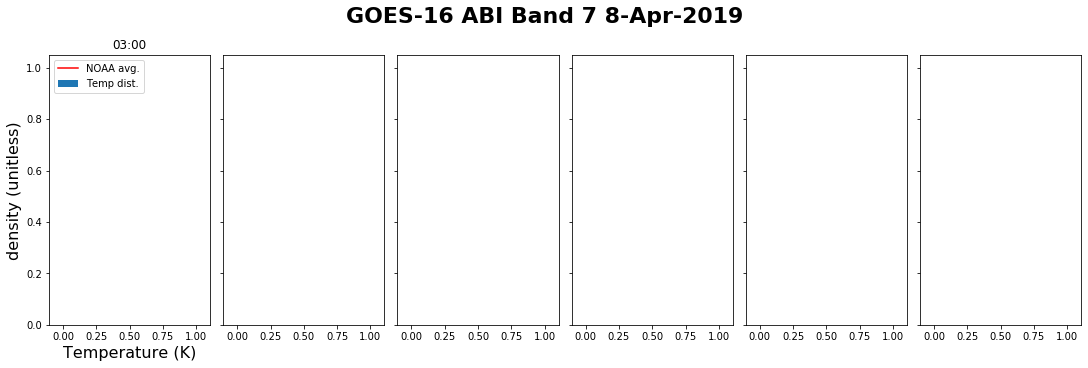

In [5]:
##Generate unfiltered histograms

Tmean = []
times = []
toi = ['0300','0910','1010','1350','1510','2100']
for (bb,dd) in list(itertools.product(range(7,11),range(11))):
    for SS in ['16','17']:
        bins = np.linspace(220,250,101)
        fig, axes = plt.subplots(ncols=6, nrows =1, figsize=(15, 5), constrained_layout=True, sharey = True, sharex = True)
        fig.suptitle(f'GOES-{SS} ABI Band {bb} {8+dd}-Apr-2019', fontsize = 22, fontweight = 'bold')
        DD = str(98+dd).zfill(3)
        lookup = f'M6C{str(bb).zfill(2)}_G{SS}_s2019{DD}'
        ncFiles = [f for f in os.listdir(ncPath) if re.search(lookup,f)]
        npFiles = [f for f in os.listdir(npPath) if re.search(lookup,f)]

        for ncf, npf in zip(ncFiles,npFiles):
            imageBox = np.load(op.join(npPath,npf))
            myFile = xr.open_dataset(op.join(ncPath,ncf))
            planck_fk1 = float(myFile['planck_fk1'].data)
            planck_fk2 = float(myFile['planck_fk2'].data) 
            planck_bc1 = float(myFile['planck_bc1'].data)                       
            planck_bc2 = float(myFile['planck_bc2'].data)     
            T = Rad2BT(imageBox.mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)
            tString = ncf[34:38]
            times.append(tString)
            Tmean.append(T)

            if tString in toi:
                ax = axes[toi.index(tString)]
                hh = tString[:2]
                mm = tString[2:4]
                ax.set_title(f'{hh}:{mm}')
                ax.set_ylabel('density (unitless)',fontsize = 16)
                ax.set_xlabel('Temperature (K)', fontsize = 16)

                Tbox = Rad2BT(imageBox, planck_fk1, planck_fk2, planck_bc1, planck_bc2)
                ax.hist(Tbox.ravel(), bins = bins, density = True, label = 'Temp dist.')
                #ax.plot([T,T], [0,0.3],'r', label = 'something')
                ax.axvline(T, color='r',label = 'NOAA avg.')
            axes[0].legend(loc='upper left')
        fig.savefig('..'+ op.join(DATAPATH,f"Histograms_unfiltered/M6C{str(bb).zfill(2)}_G_{SS}_04-{str(8+dd).zfill(2)}-2019"))

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No hand

/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
N

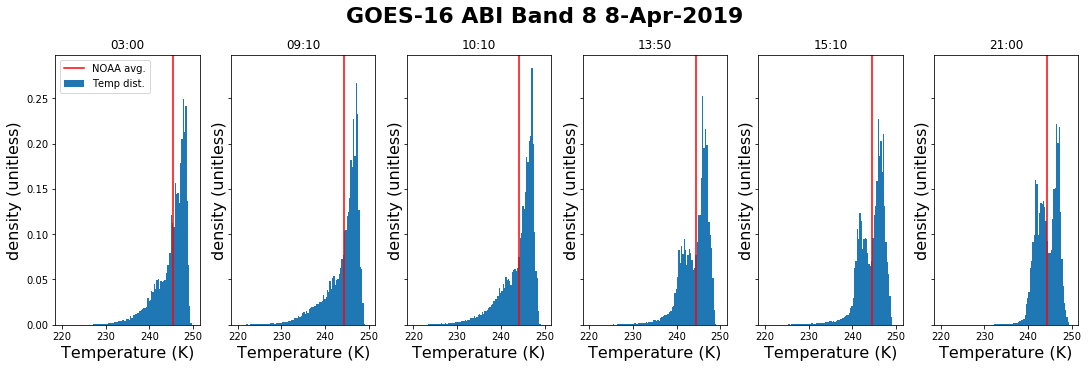

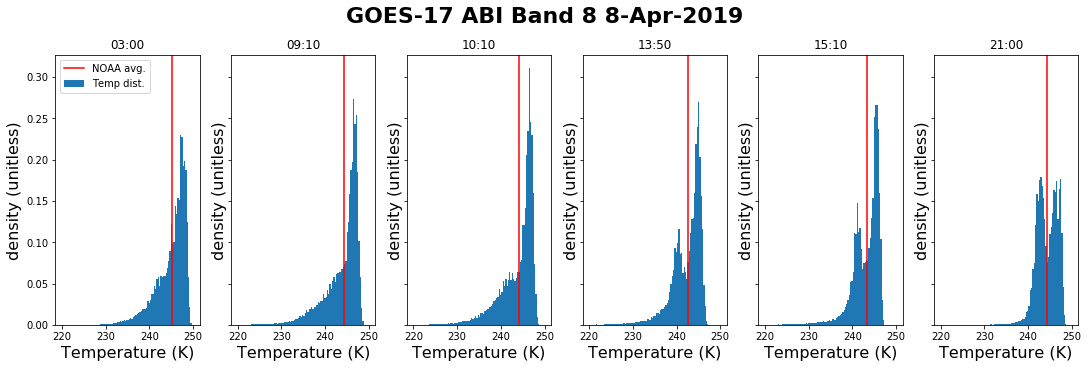

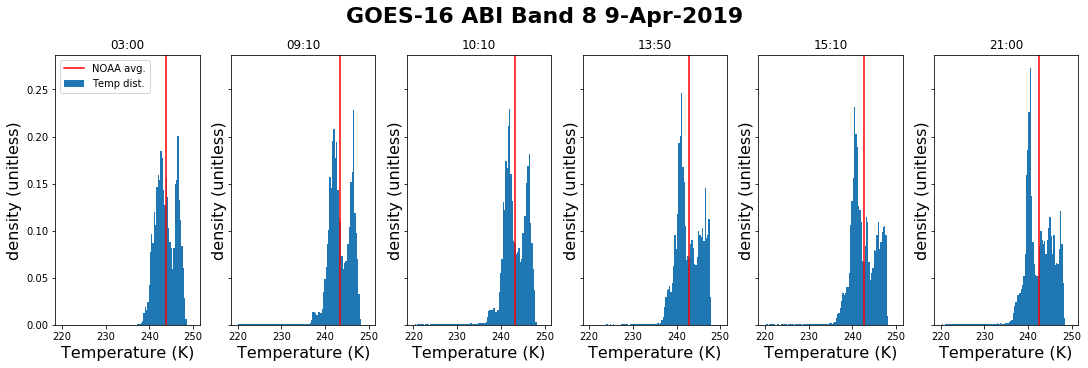

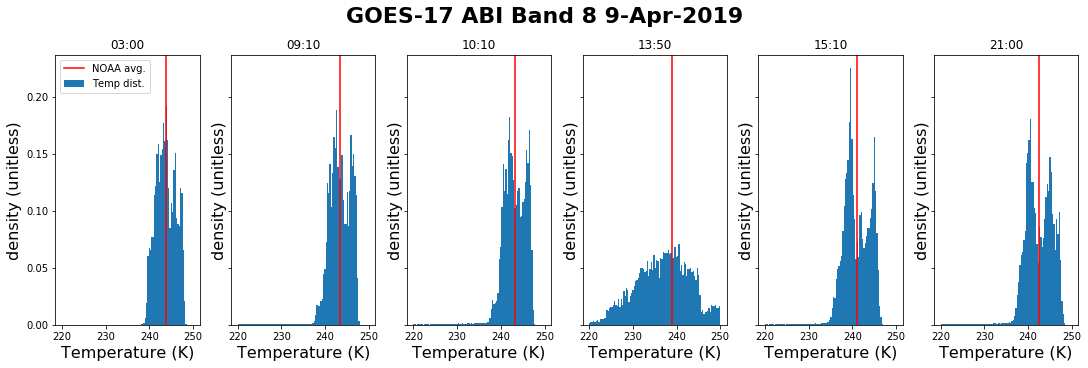

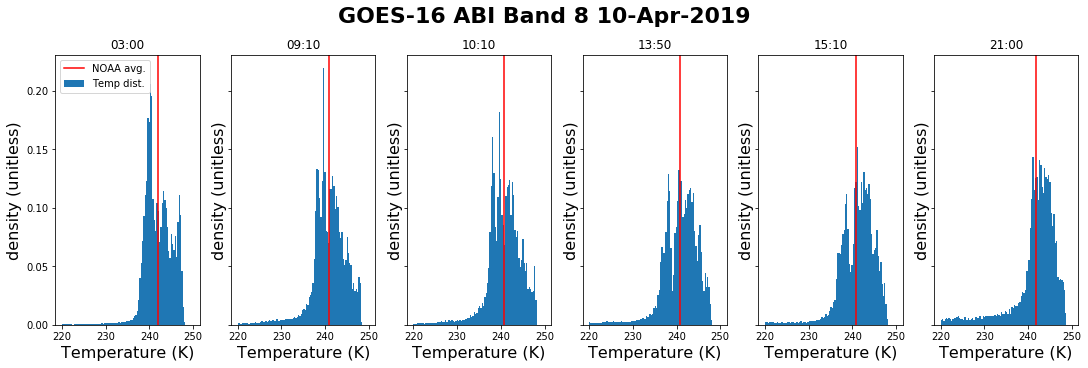

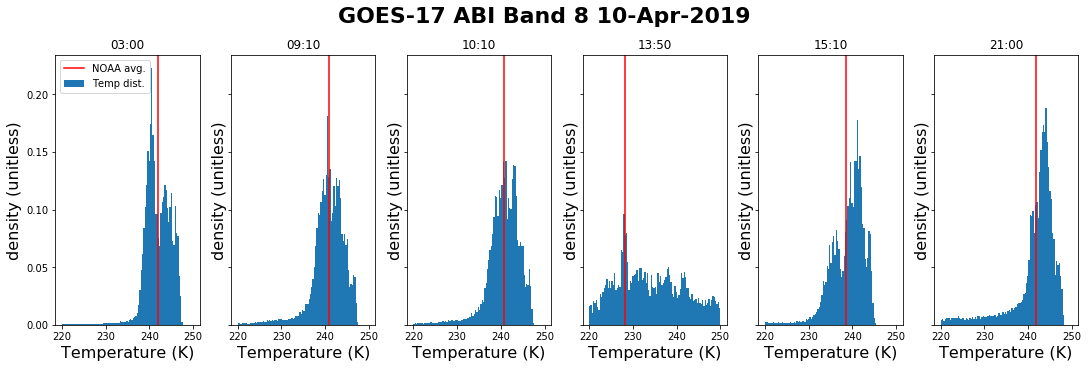

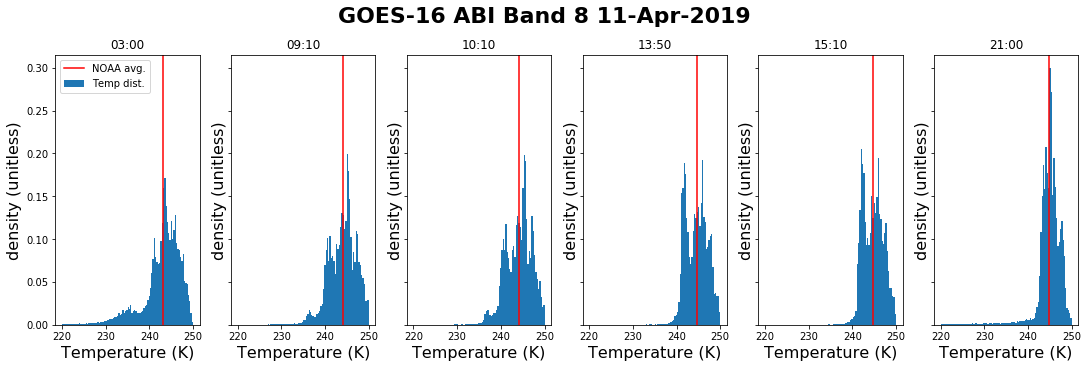

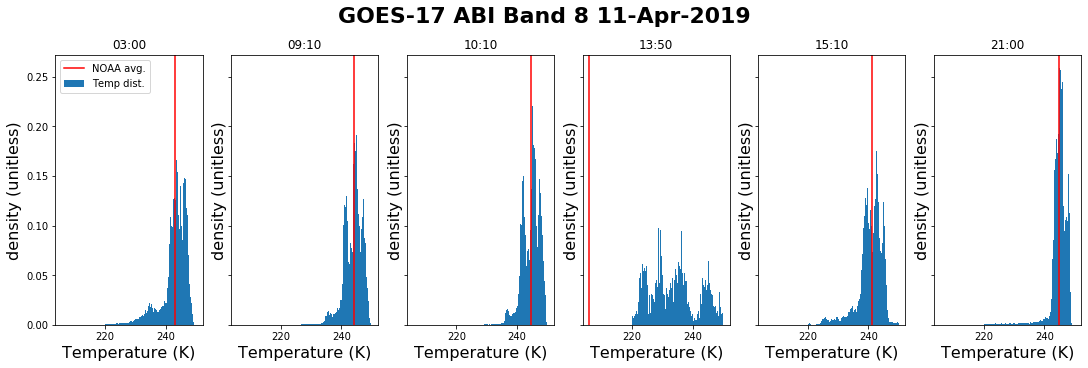

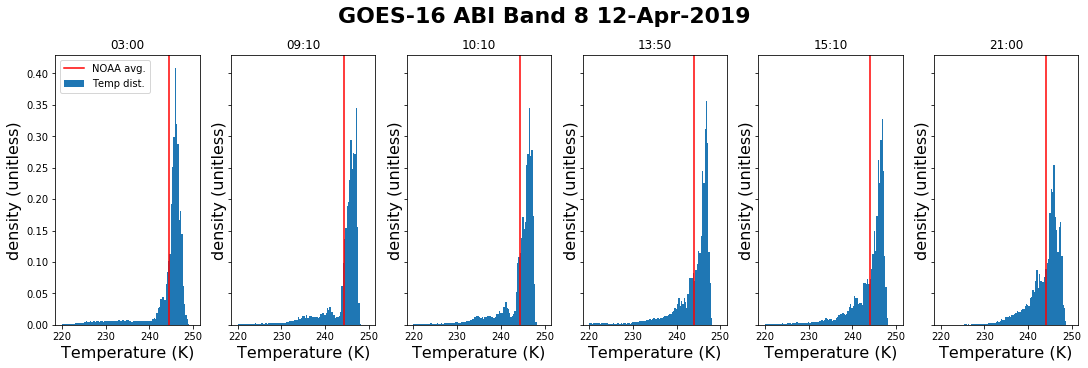

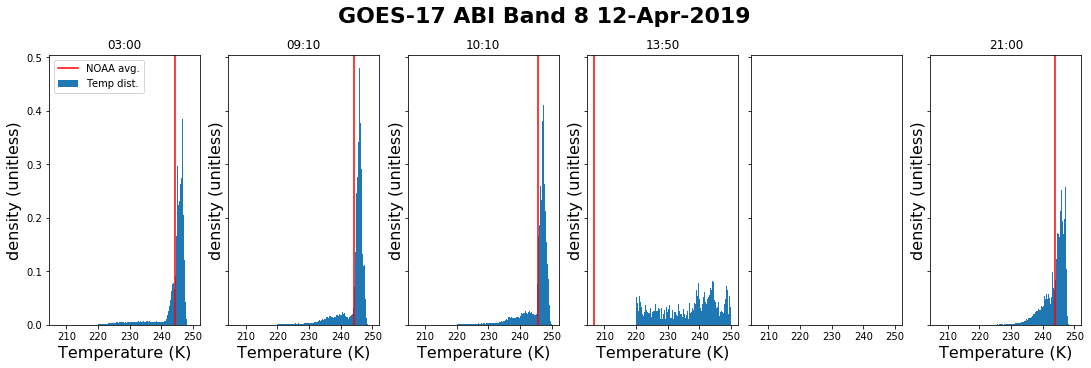

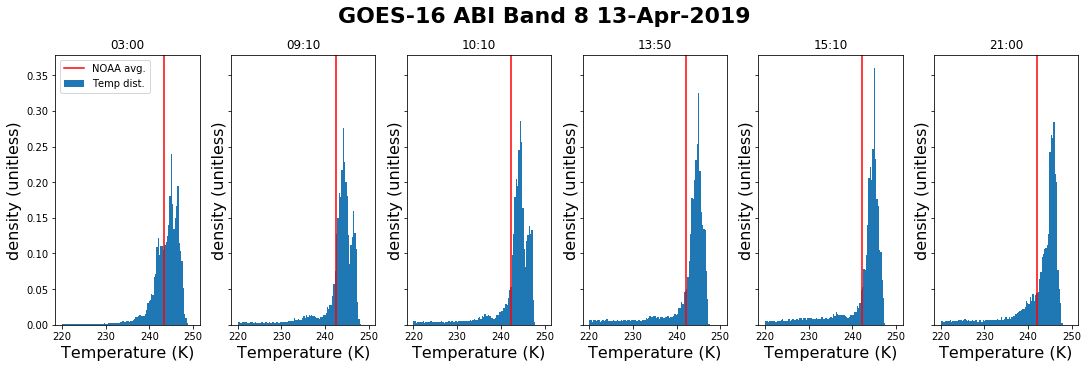

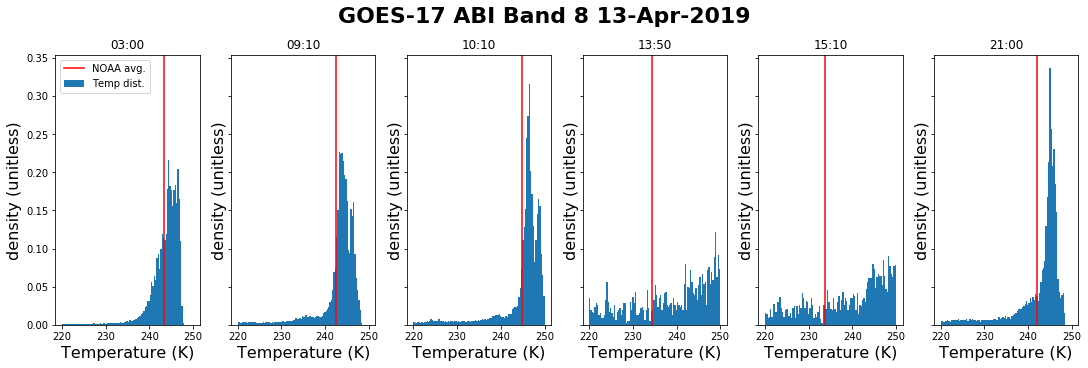

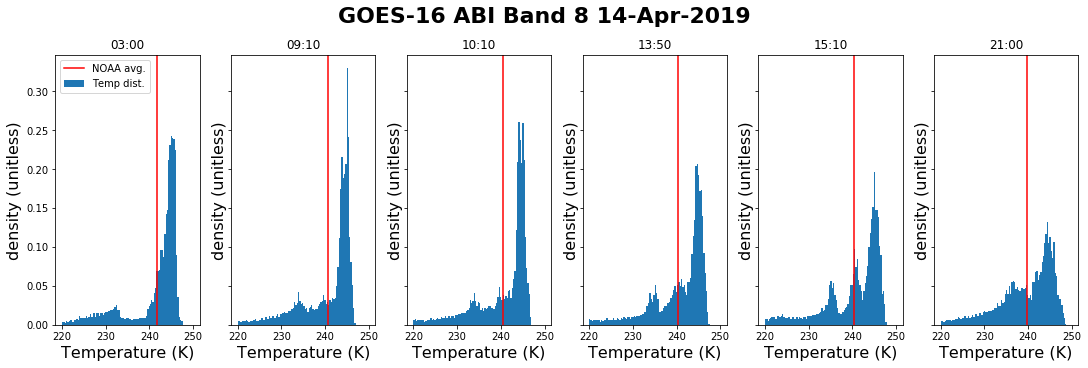

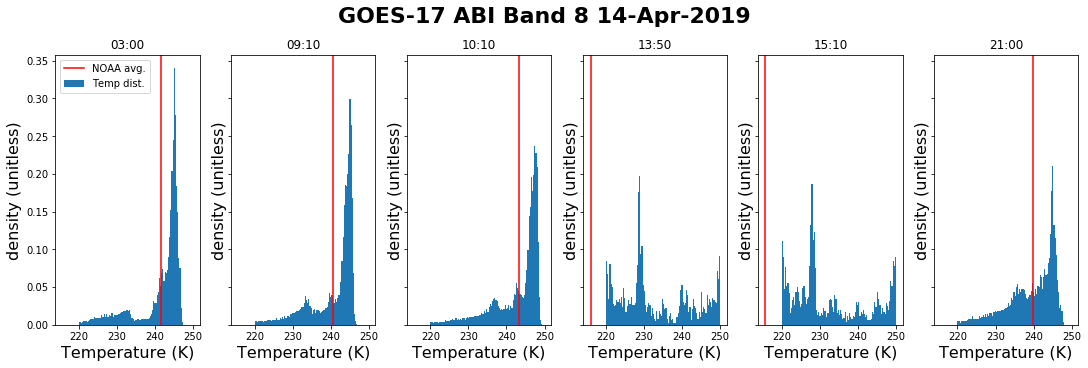

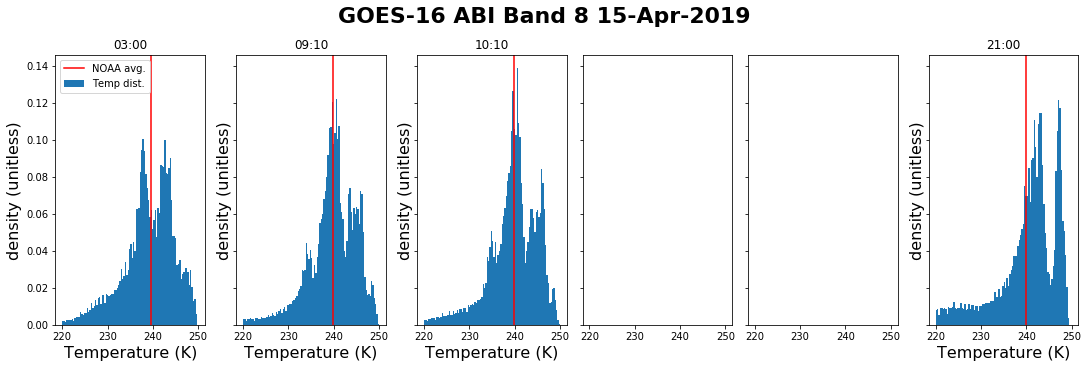

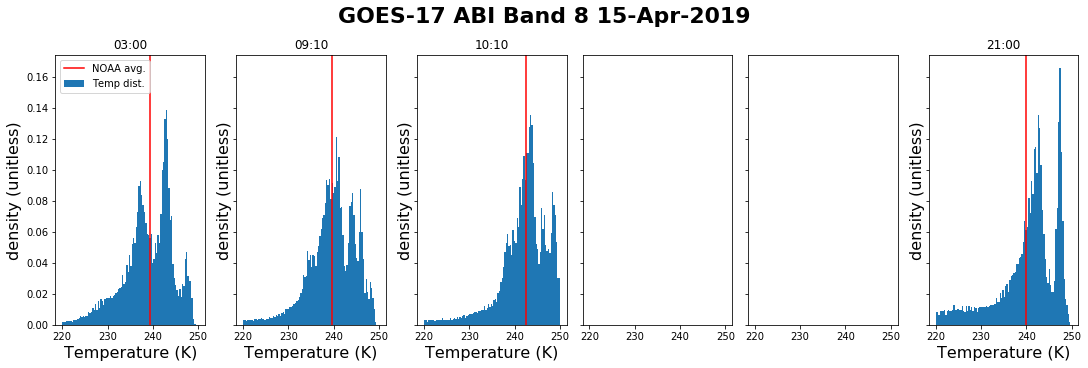

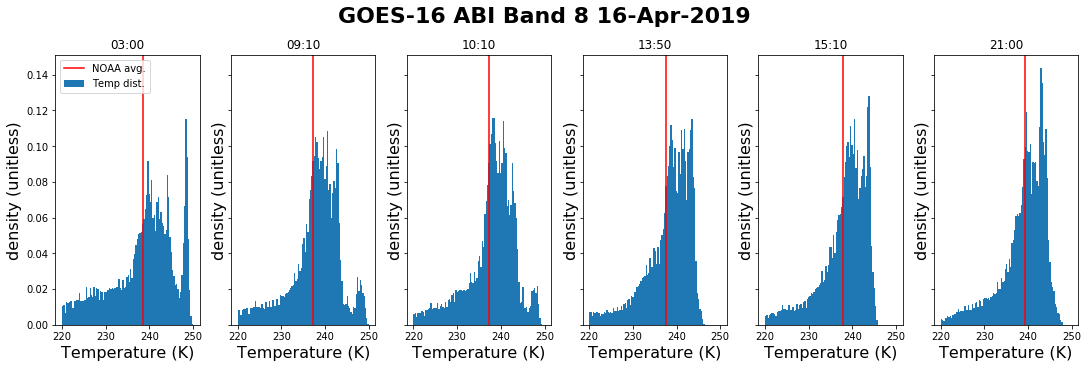

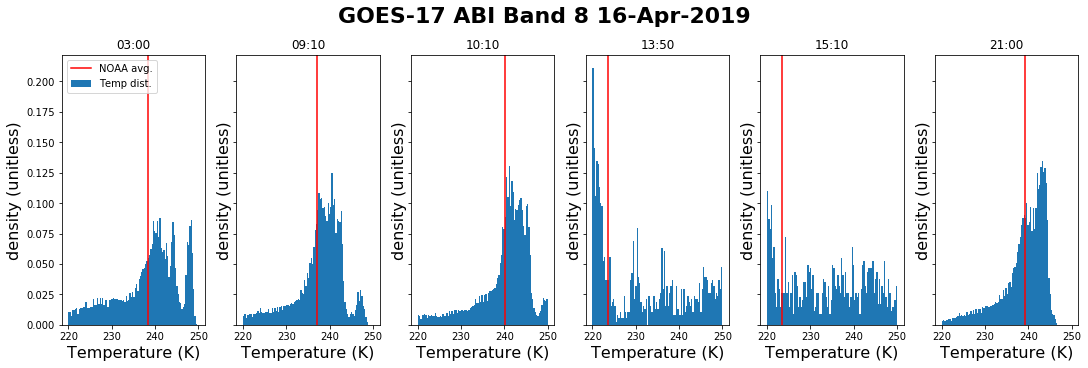

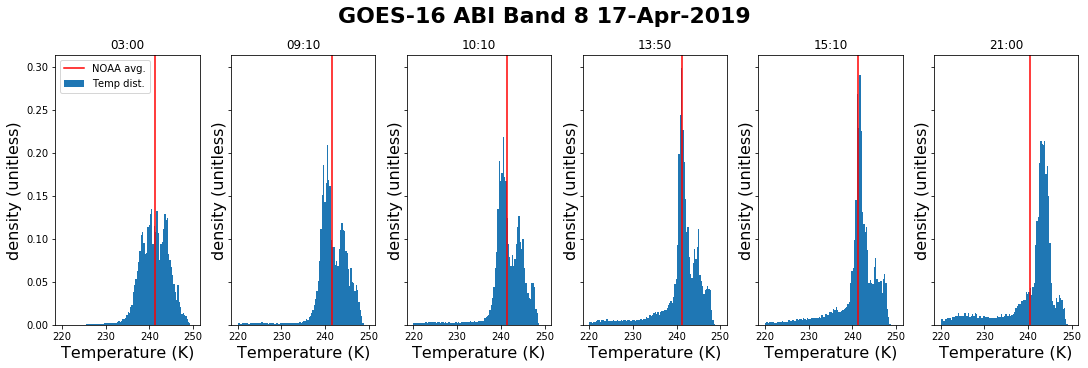

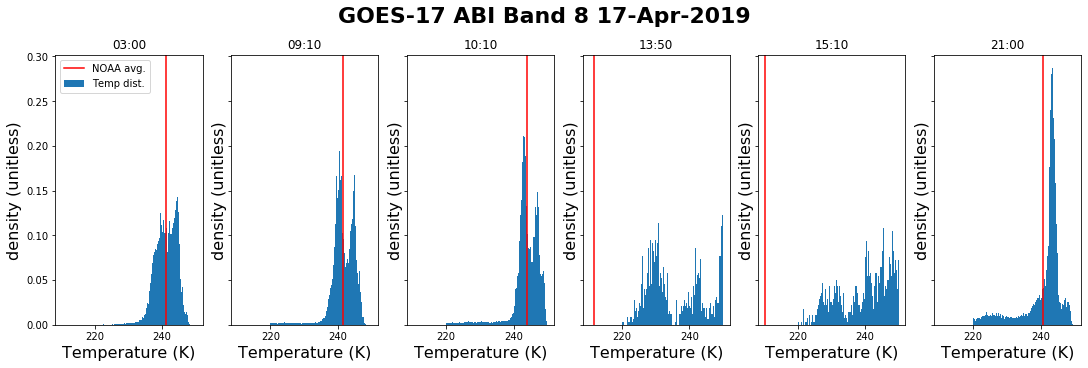

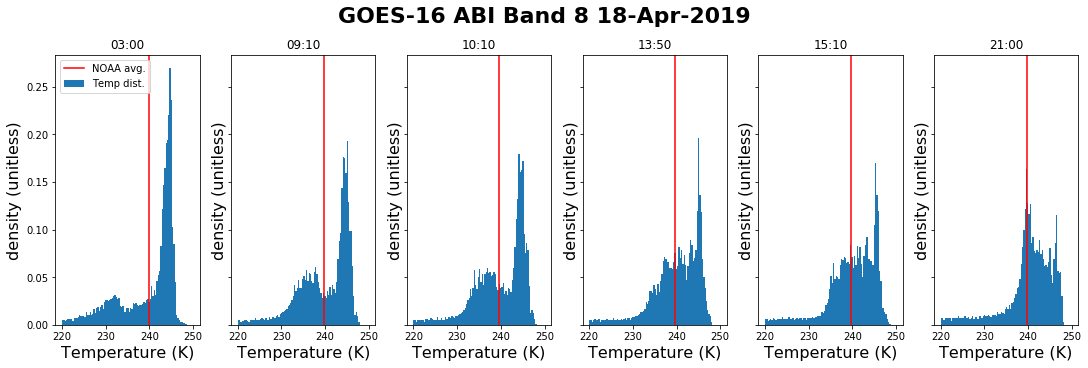

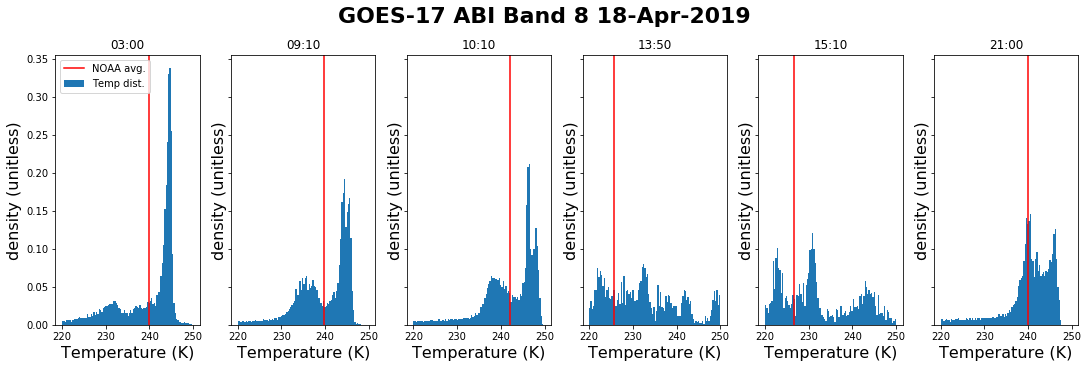

In [34]:
Tmean = []
times = []
toi = ['0300','0910','1010','1350','1510','2100']
for (bb,dd) in list(itertools.product([8],range(11))):
    for SS in ['16','17']:
        bins = np.linspace(220,250,101)
        fig, axes = plt.subplots(ncols=6, nrows =1, figsize=(15, 5), constrained_layout=True, sharey = True, sharex = True)
        fig.suptitle(f'GOES-{SS} ABI Band 8 {8+dd}-Apr-2019', fontsize = 22, fontweight = 'bold')
        DD = str(98+dd).zfill(3)
        lookup = f'M6C08_G{SS}_s2019{DD}'
        ncFiles = [f for f in os.listdir(ncPath) if re.search(lookup,f)]
        npFiles = [f for f in os.listdir(npPath) if re.search(lookup,f)]

        for ncf, npf in zip(ncFiles,npFiles):
            imageBox = np.load(op.join(npPath,npf))
            myFile = xr.open_dataset(op.join(ncPath,ncf))
            planck_fk1 = float(myFile['planck_fk1'].data)
            planck_fk2 = float(myFile['planck_fk2'].data) 
            planck_bc1 = float(myFile['planck_bc1'].data)                       
            planck_bc2 = float(myFile['planck_bc2'].data)     
            T = Rad2BT(imageBox.mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)
            tString = ncf[34:38]
            times.append(tString)
            Tmean.append(T)

            if tString in toi:
                ax = axes[toi.index(tString)]
                hh = tString[:2]
                mm = tString[2:4]
                ax.set_title(f'{hh}:{mm}')
                ax.set_ylabel('density (unitless)',fontsize = 16)
                ax.set_xlabel('Temperature (K)', fontsize = 16)

                Tbox = Rad2BT(imageBox, planck_fk1, planck_fk2, planck_bc1, planck_bc2)
                ax.hist(Tbox.ravel(), bins = bins, density = True, label = 'Temp dist.')
                #ax.plot([T,T], [0,0.3],'r', label = 'something')
                ax.axvline(T, color='r',label = 'NOAA avg.')
            axes[0].legend(loc='upper left')
        fig.savefig('..'+ op.join(DATAPATH,f"Histograms_filtered/G_{SS}_04-{str(8+dd).zfill(2)}-2019"))

# Plots for April 8 through 18.

/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret

/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret

/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret

/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret

/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret

/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/opt/home/adomakor412/.conda/envs/NOAA/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret

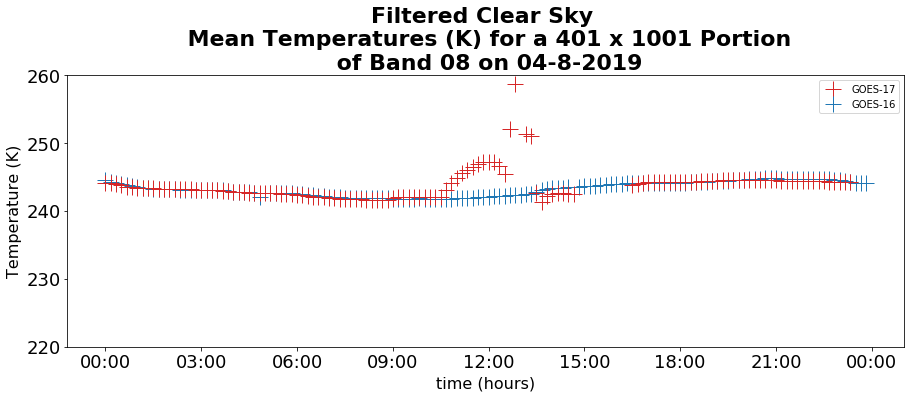

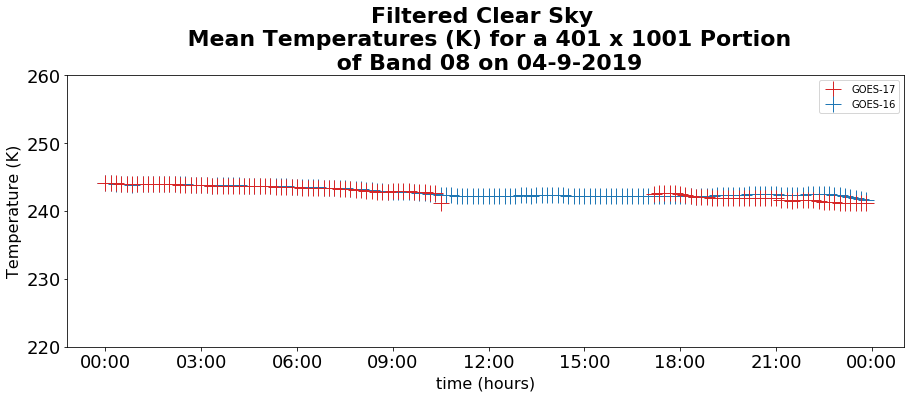

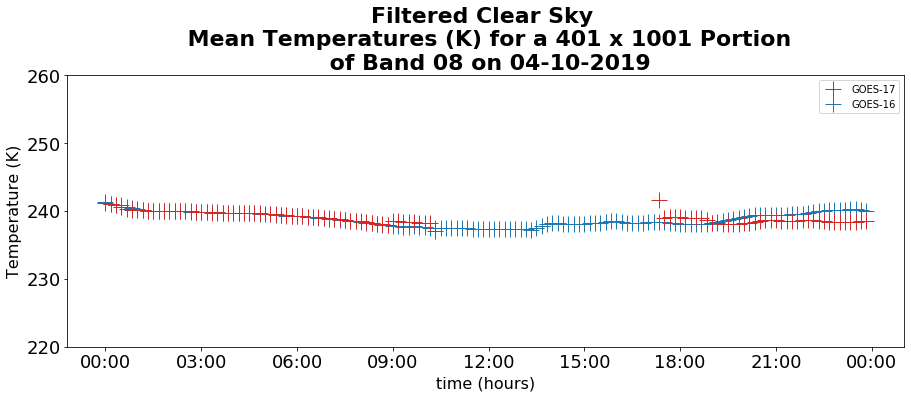

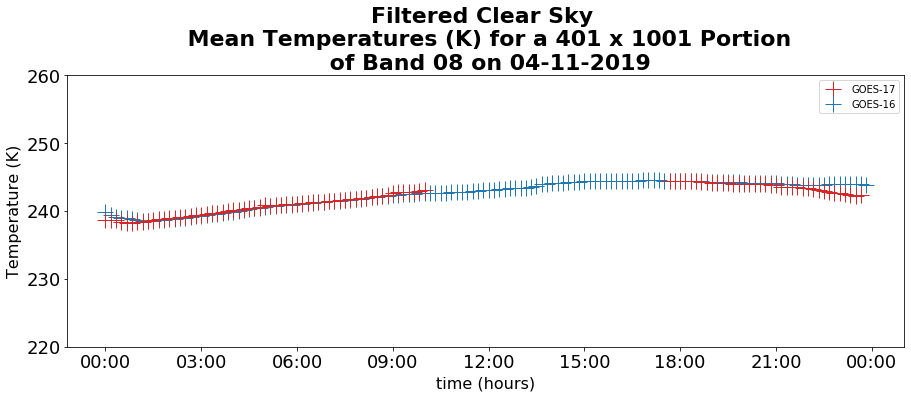

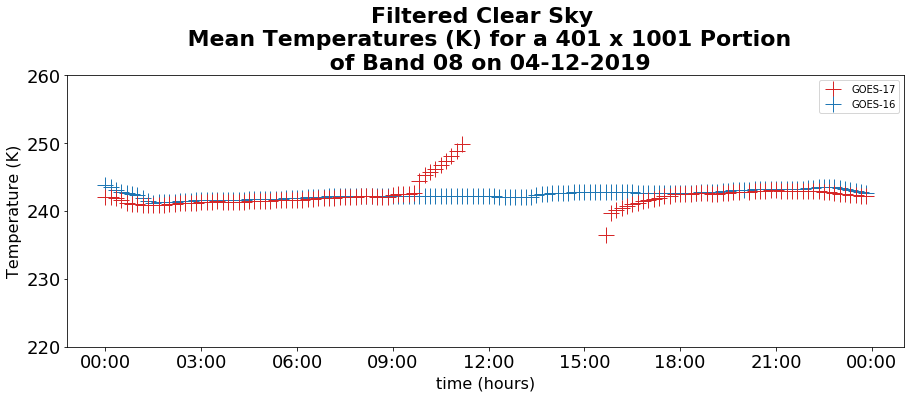

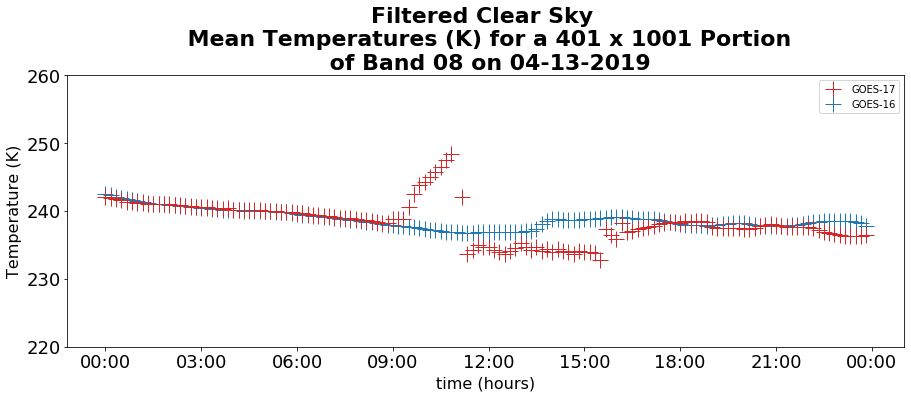

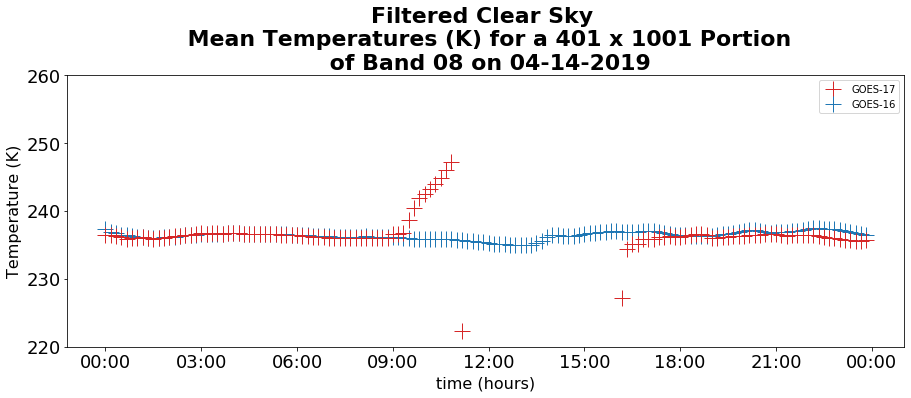

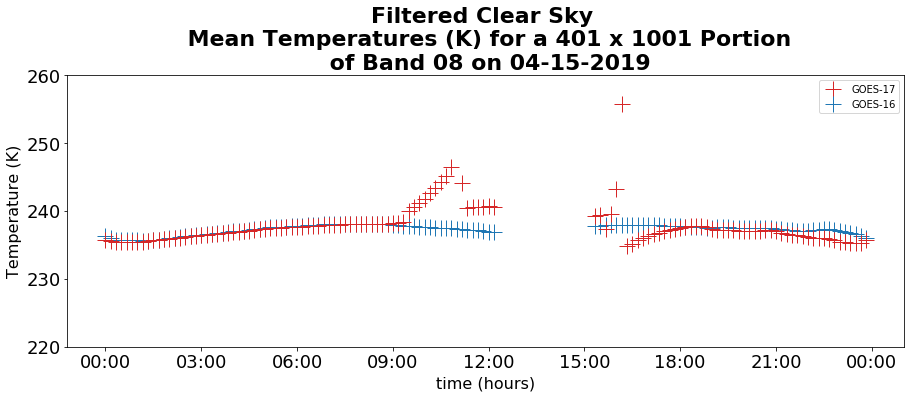

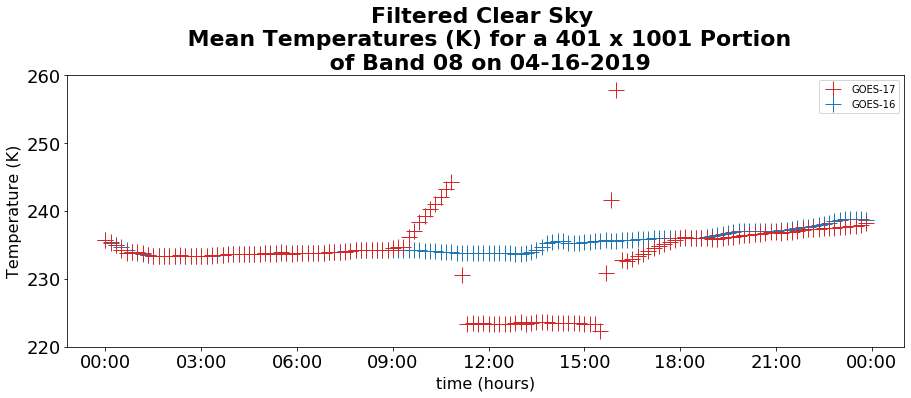

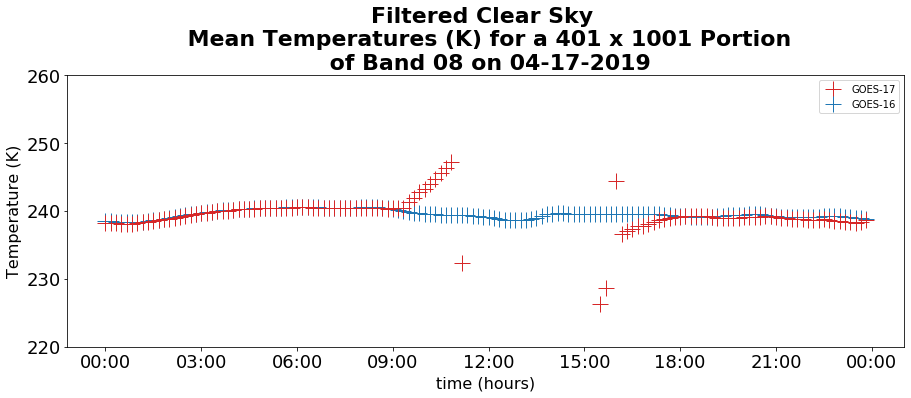

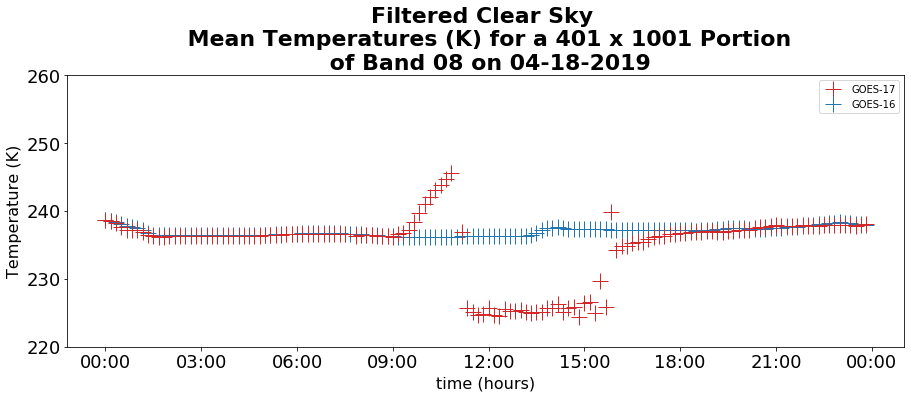

In [26]:
for i in [8]:
    for j in range(11):
        band = str(i).zfill(2)
        date = 98 + j
        day = str(date).zfill(3)
        
        times17, mean17 = getTmean('17', npPath, band, day)
        times16, mean16 = getTmean('16', npPath, band, day)
    
        ptimes17 = [datetime.strptime(f"2019{day}{t}", "%Y%j%H%M") for t in times17]
        ptimes16 = [datetime.strptime(f"2019{day}{t}", "%Y%j%H%M") for t in times16]
        fig, ax1 = plt.subplots(figsize=(15,5))#constrained_layout=False
        _ = ax1.plot_date(ptimes17, mean17 , label="GOES-17", color='tab:red', marker='+', markersize = 16)
        _ = ax1.plot_date(ptimes16, mean16 , label='GOES-16', color='tab:blue', marker='+', markersize = 16, zorder=-1)
        _ = ax1.set_ylim(220,260)
        _ = ax1.tick_params('both', labelsize=18)
        _ = ax1.legend()
        _ = ax1.set_title(f'Filtered Clear Sky \n Mean Temperatures (K) for a 401 x 1001 Portion\n of Band 08 on 04-{str(8+j)}-2019', fontweight ='bold', fontsize = 22)
        _ = ax1.set_ylabel('Temperature (K)',fontsize = 16)
        _ = ax1.set_xlabel('time (hours)',fontsize = 16)
        _ = ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        
        
        _ = plt.savefig('..'+ op.join(DATAPATH,f"Mean_temp_filtered/04-{str(8+j).zfill(2)}-2019"))
        